<h1>FULL WORKFLOW</h1>
<hr>

<b><h3>About This File</h3></b>
This data was gathered during last year's campaign.
Data description is as follows;
<ul><li>
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise</li><li>
ID - Unique ID of each customer</li><li>
Year_Birth - Age of the customer</li><li>
Complain - 1 if the customer complained in the last 2 years</li><li>
Dt_Customer - date of customer's enrollment with the company</li><li>
Education - customer's level of education</li><li>
Marital - customer's marital status</li><li>
Kidhome - number of small children in customer's household</li><li>
Teenhome - number of teenagers in customer's household</li><li>
Income - customer's yearly household income</li><li>
MntFishProducts - the amount spent on fish products in the last 2 years</li><li>
MntMeatProducts - the amount spent on meat products in the last 2 years</li><li>
MntFruits - the amount spent on fruits products in the last 2 years</li><li>
MntSweetProducts - amount spent on sweet products in the last 2 years</li><li>
MntWines - the amount spent on wine products in the last 2 years</li><li>
MntGoldProds - the amount spent on gold products in the last 2 years</li><li>
NumDealsPurchases - number of purchases made with discount</li><li>
NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)</li><li>
NumStorePurchases - number of purchases made directly in stores</li><li>
NumWebPurchases - number of purchases made through the company's website</li><li>
NumWebVisitsMonth - number of visits to company's website in the last month</li><li>
Recency - number of days since the last purchase</li></ul><br>

<b>Context :-</b> A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only $499$ which is $999$ on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.<br>
<b>Objective :-</b> The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. <br>
<b>PROBLEM STATEMENT: You need to analyze the data provided to identify the different factors which affect the customer's response and then build a prediction model to predict the probability of a customer will give a positive response.</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFECV, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [ ]:
# pd.set_option('display.max_columns', 500)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/superstore_data.csv')
data.drop(['Id'], axis = 1, inplace = True)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
# OBJECTIVES OF THE PROJECT
# - Find the ratio of graduatants to non- graduants
# - Find the ration of divorced to single to married
# - Construct a time series of when the customers join to ascertain the day with the highest join
# - ascertain the age range of most of the customers 
# - Ascertain whether this age range affects income
# - Construct the age range that buys each of the products the most
# - Ascertain what age bracket earns the most income
# - Ascertain if there is no multi - colinearity (Using VIF or Correlation Matrix)
# - Ascertan if there is a Linear Relationship between the  features
# - Feature Preprocessing using select k best (random Forest) to identify the features that affects customers response
# - Principal Component Analysis
# - Modelling using XGBOOST and Random Forest

<h3><b>SUMMARY STATISTICS</b></h3>
<hr>

In [ ]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
data.isnull().sum().sort_values(ascending = False).head(3)

Income             24
Year_Birth          0
MntFishProducts     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [ ]:
data.Income.fillna(data.Income.mean(), inplace = True)
data.Income.isnull().sum()

0

<h3><b>EXPLORATORY DATA ANALYSIS</b></h3>
<hr>

In [ ]:
def histogram(dataframe):
  plt.figure(figsize = (10, 5))
  sns.set(style = 'darkgrid')
  sns.histplot(dataframe, palette = 'husl')

Text(0.5, 1.0, 'Education Histogram')

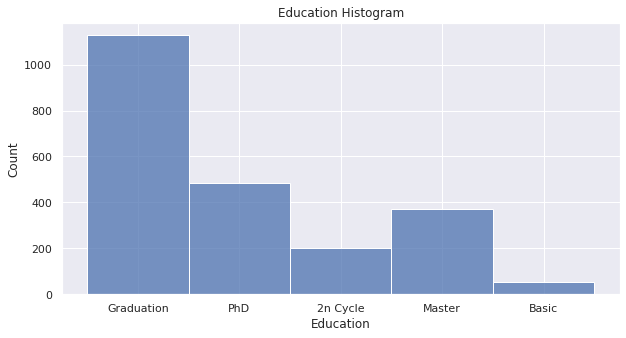

In [ ]:
# - Find the ratio of graduatants to non- graduants
histogram(data.Education)
plt.title('Education Histogram')

The visualization above shows the customer base have more Higher Educated individuals than basic education individuals

Text(0.5, 1.0, 'Marital Status Histogram')

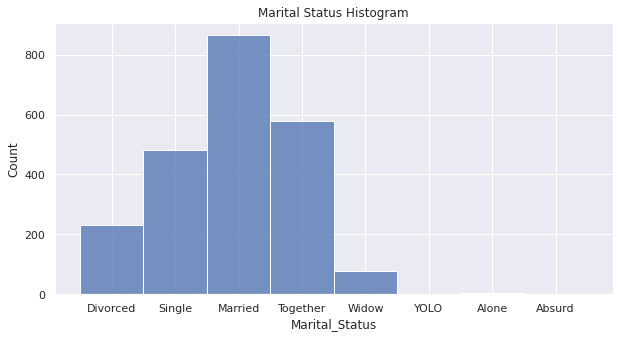

In [ ]:
# - Find the ratio of marital status 
histogram(data.Marital_Status)
plt.title('Marital Status Histogram')

The visualization above shows most of the customer base are married individuals tahn other marital status.

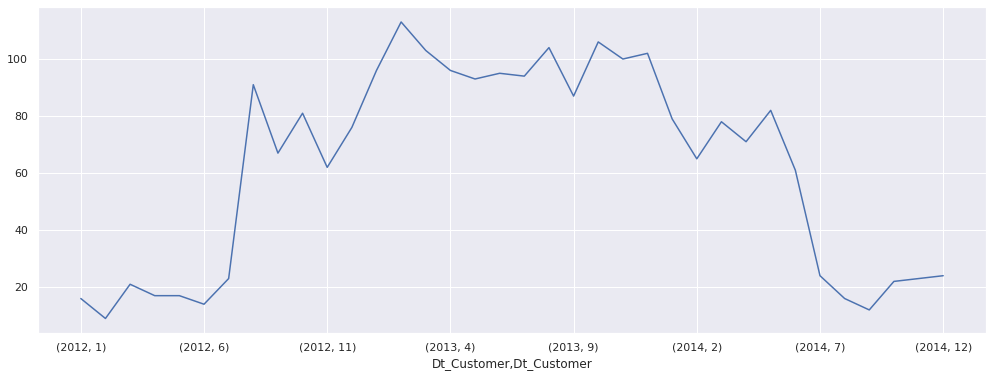

In [ ]:
# - Construct a time series of when the customers join to ascertain the day with the highest join
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
plt.figure(figsize = (17, 6))
vb = data.groupby([data["Dt_Customer"].dt.year, data["Dt_Customer"].dt.month]).count()
vb.Dt_Customer.plot(kind = 'line')

The chart above shows us that the date with most onboarding is in the early months of 2014

,Education,Marital_Status,Age,Age_category,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,Graduation,Divorced,53,old,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,Graduation,Single,62,old,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,Graduation,Married,65,old,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0


Text(0.5, 1.0, 'Age Category Histogram')

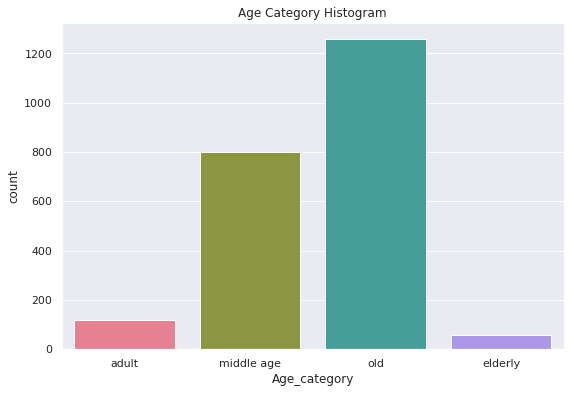

In [ ]:
# - ascertain the age range of most of the customers 

frame = data.copy()

import datetime
today = datetime.date.today() # ................................................ Instantiate today's date
current_year = today.year # .................................................... Instantiate the current year of today

age_container = [] # ........................................................... Create a container that will contain the each age customers

for i in frame.Year_Birth: 
  age_container.append(current_year - i) # ..............Create a loop that deducts today's year from customer's year and save it to age container

container = pd.Series({'Age': age_container}) # ................................ Turn the age container into a pandas series
frame['Age'] = age_container # ................................................. Convert the series to a column in the original dataframe

# Create a category of the newly created age using bins
frame['Age_category'] = pd.cut(x = frame['Age'], bins = [22, 35, 50, 75, 131], labels = ['adult', 'middle age', 'old', 'elderly'])

# Reposition the newly create age column
moving_position = frame.pop('Age')
moving_position1 = frame.pop('Age_category')
frame.insert(3, "Age", moving_position)
frame.insert(4, "Age_category", moving_position1)
frame.drop(['Year_Birth'], axis = 1, inplace = True)
display(frame.head(3))

# Plot these categories for visualization
plt.figure(figsize = (9, 6))
sns.set(style = 'darkgrid')
sns.countplot(frame.Age_category, palette = 'husl')
plt.title('Age Category Histogram')

The visualization shows that the people within the age range of 50 - 75 mostly populates the custmer base.

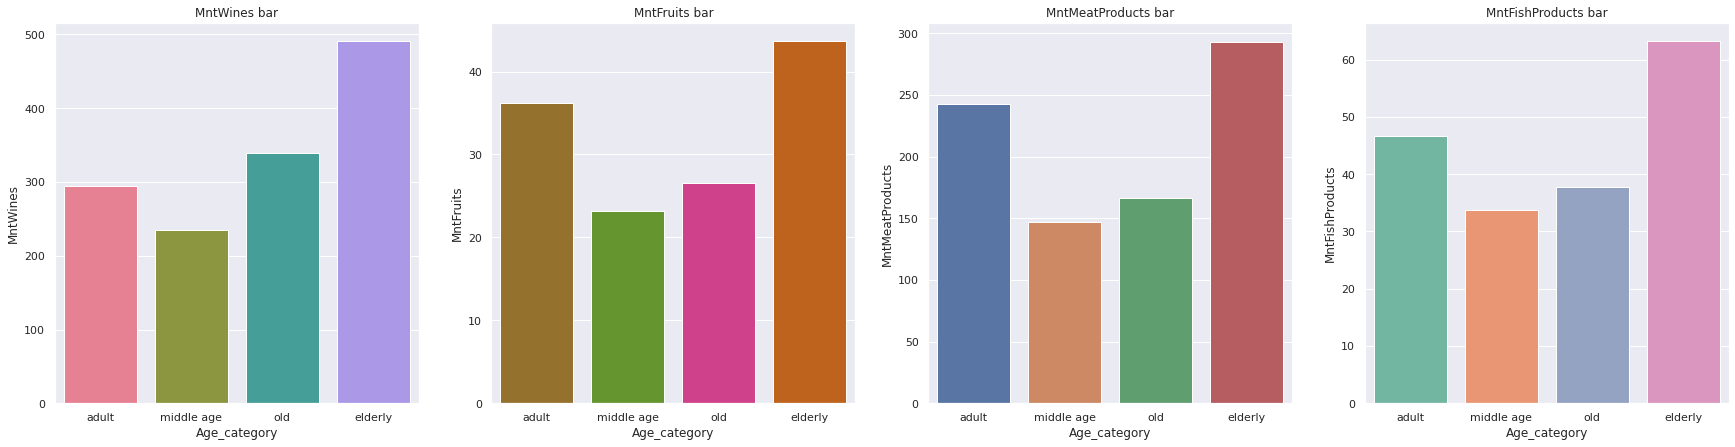

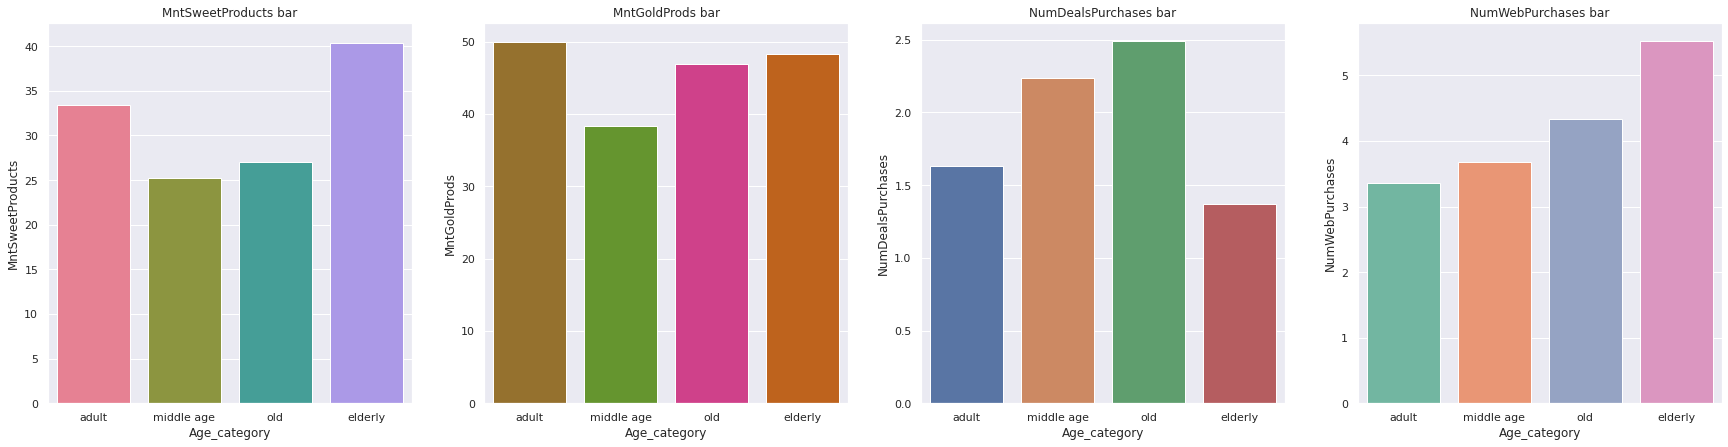

In [ ]:
# - Construct a the age range that buys each of the products the most

def purchases (dataframe, a, b, c, d, dependent):
    plt.figure(figsize =(30,7))
    sns.set(style = 'darkgrid')
    plt.subplot(1,4,1)
    sns.barplot(dataframe[dependent],dataframe[a], ci = 0, palette = 'husl')
    plt.title(a + ' bar')
    plt.ylabel(a)
    plt.xlabel(dependent)
    plt.subplot(1,4,2)
    sns.barplot(dataframe[dependent],dataframe[b], ci = 0, palette = 'Dark2_r')
    plt.title(b + ' bar')
    plt.ylabel(b)
    plt.subplot(1,4,3)
    sns.barplot(dataframe[dependent],dataframe[c], ci = 0)
    plt.title(c + ' bar')
    plt.ylabel(c)
    plt.subplot(1,4,4)
    sns.barplot(dataframe[dependent],dataframe[d], ci = 0, palette = 'Set2')
    plt.title(d + ' bar')
    plt.ylabel(d)
    plt.show()


purchases(frame, 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'Age_category')
purchases(frame, 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'Age_category')

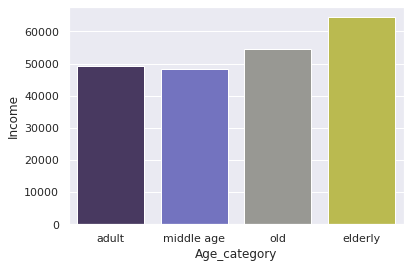

In [ ]:
# - Ascertain the age bracket that makes the most income
sns.barplot(frame.Age_category, frame.Income, ci = 0, palette = 'gist_stern')

0    1906
1     334
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response', ylabel='count'>

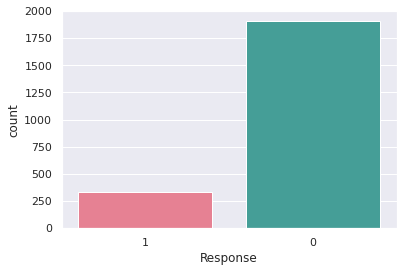

In [ ]:
# - Plot the Target column to know its kind of distribution if its Balanced or Imbalanced

display(frame.Response.value_counts())
vb = frame.Response.astype(str)
sns.countplot(vb, palette = 'husl')

There is a high imbalance in the target output<br>
class 0 = 1906 entries<br>
class 1 = 334 entries.<br>
We redeem this imbalance using

<AxesSubplot:>

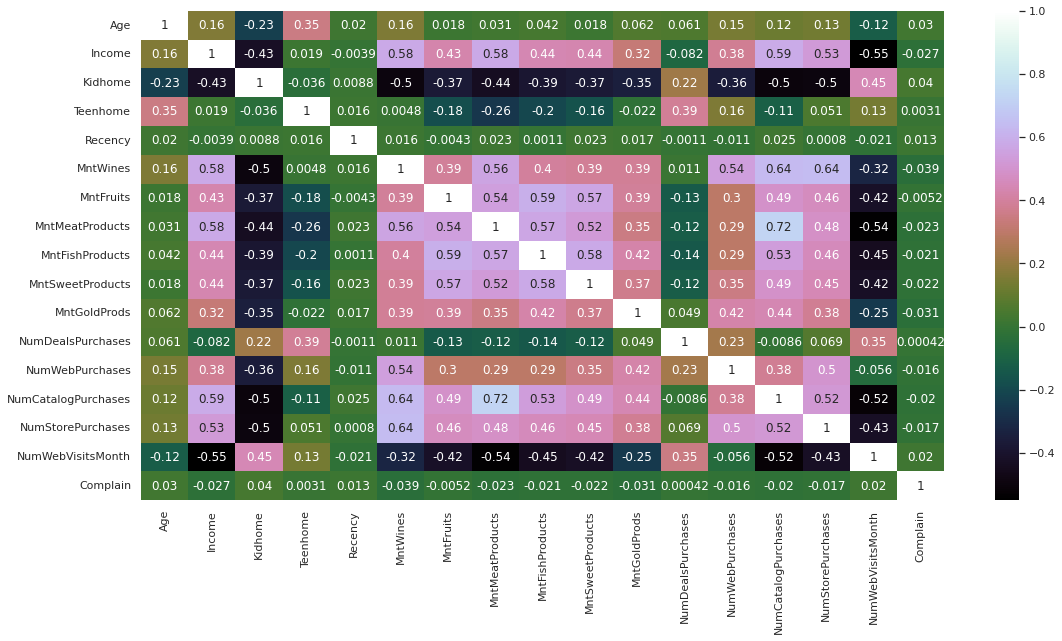

In [ ]:
# - Ascertain if there is no multi - colinearity (Using VIF or Correlation Matrix)
plt.figure(figsize = (18, 9))
sns.heatmap(frame.drop(['Response'],axis = 1).corr(), annot = True, cmap = 'cubehelix' )

Text(0.5, 1.0, 'Age and Education')

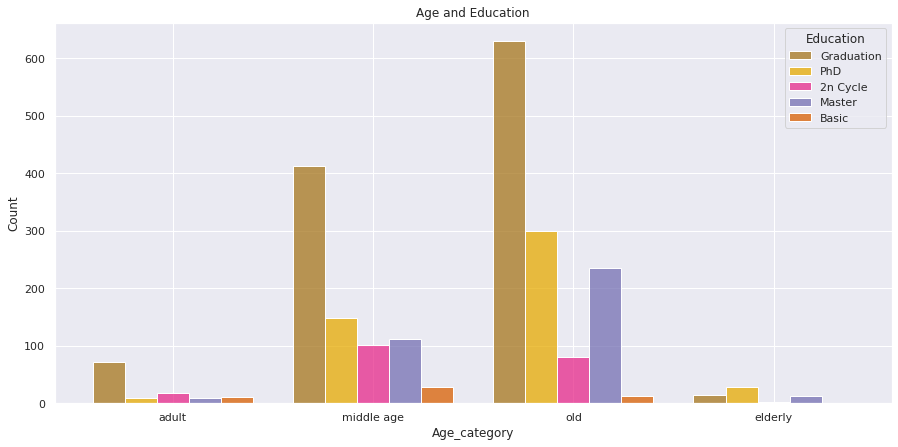

In [ ]:
# - The education Level of all age category

plt.figure(figsize=(15,7))
sns.histplot(data = frame, x = 'Age_category', hue = 'Education', multiple = 'dodge', shrink = .8, palette = 'Dark2_r')
plt.title('Age and Education')

Text(0.5, 1.0, 'Education and Marital Status')

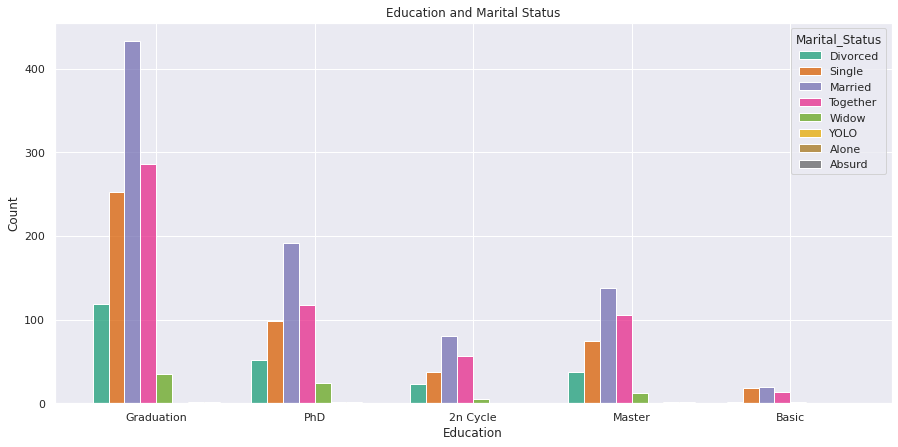

In [ ]:
plt.figure(figsize=(15,7))
sns.histplot(data = frame, x = 'Education', hue = 'Marital_Status', multiple = 'dodge', shrink = .8, palette = 'Dark2')
plt.title('Education and Marital Status')

In [ ]:
cat = frame.select_dtypes(include = ['object', 'category'])
num = frame.select_dtypes(include = 'number')
print(f"categorical features: {cat.shape}\n numerical features: {num.shape}")

categorical features: (2240, 1)
 numerical features: (2240, 21)


In [ ]:
cat.head(3)

,Education,Marital_Status,Age_category,Dt_Customer
0,Graduation,Divorced,old,6/16/2014
1,Graduation,Single,old,6/15/2014
2,Graduation,Married,old,5/13/2014


In [ ]:
# - In the categorical dataset, there are some ordinal features (herierachy), so we treat differently

frame['Education'] = frame['Education'].replace({'PhD': 5, 'Master': 4, 'Graduation': 3, 'Basic': 2, '2n Cycle': 1}) # ........... Ordinal Encoding
frame['Age_category'] = frame['Age_category'].replace({'elderly': 4, 'old': 3, 'middle age': 2, 'adult': 1}) # ................... Ordinal Encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
frame['Marital_Status'] = encoder.fit_transform(frame['Marital_Status']) # ....................................................... Label Encoding

frame.head(4)

,Education,Marital_Status,Age,Age_category,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,3,2,53,3,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,3,4,62,3,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,3,3,65,3,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,3,5,56,3,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0


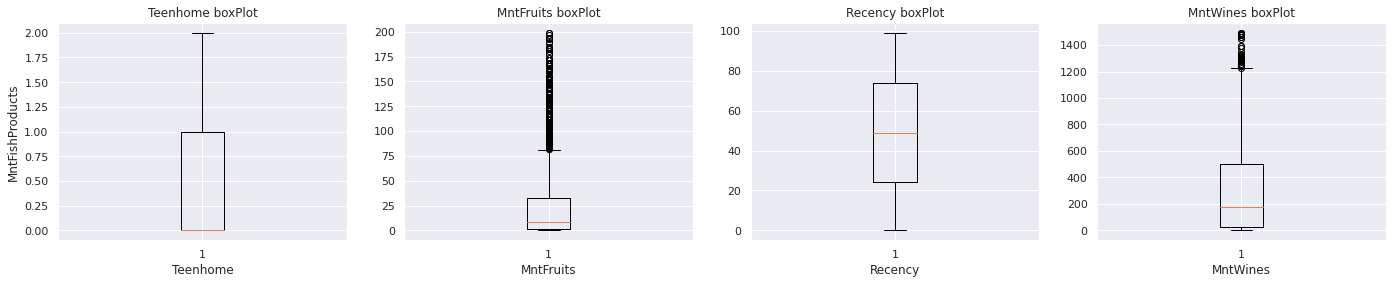

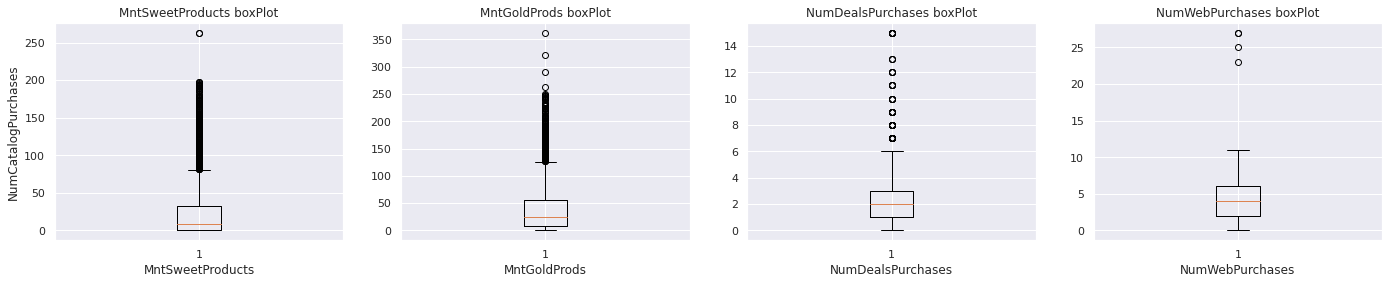

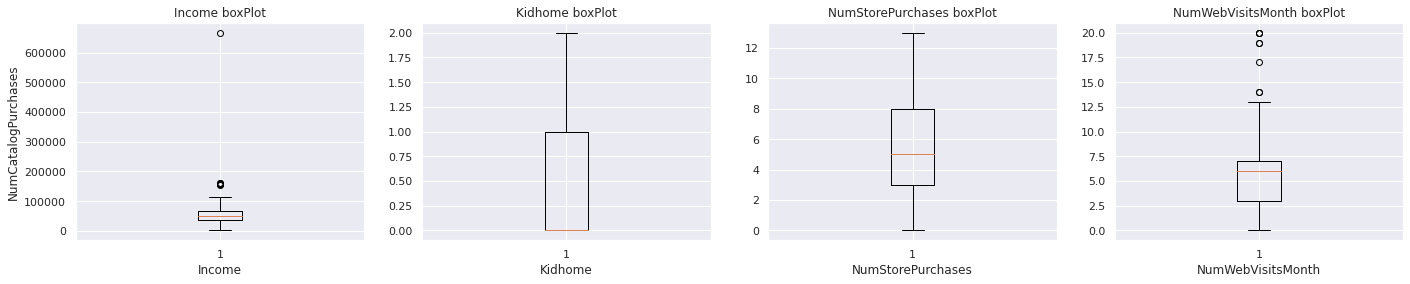

In [ ]:
# Check for outliers using the boxplot

def outlier_check (dataframe, a, b, c, d, dependent):
    plt.figure(figsize =(30,4))
    sns.set(style = 'darkgrid')
    plt.subplot(1,5,1)
    plt.boxplot(dataframe[a])
    plt.title(a + ' boxPlot')
    plt.xlabel(a)
    plt.ylabel(dependent)
    plt.subplot(1,5,2)
    plt.boxplot(dataframe[b])
    plt.title(b + ' boxPlot')
    plt.xlabel(b)
    plt.subplot(1,5,3)
    plt.boxplot(dataframe[c])
    plt.title(c + ' boxPlot')
    plt.xlabel(c)
    plt.subplot(1,5,4)
    plt.boxplot(dataframe[d])
    plt.title(d + ' boxPlot')
    plt.xlabel(d)
    plt.show()

outlier_check(frame, 'Teenhome', 'MntFruits', 'Recency', 'MntWines', 'MntFishProducts')
outlier_check(frame, 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases')
outlier_check(frame, 'Income', 'Kidhome', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumCatalogPurchases')

The plot above shows the presence of so many outliers.<br>
We will use <b>Winsorization</b><br>
<b>Winsorization:</b> Winsorization is a technique that replaces the extreme values with the nearest non-outlier values. For example, the extreme values can be replaced with the maximum or minimum values in the dataset. This method can help to reduce the impact of outliers while preserving the overall distribution of the data.

In [ ]:
# Treating Outlier by using the Winsorization Technique

ds = frame.copy()

def outlier_detect(df):
    for i in df.describe().columns:
        Q1 = df.describe().at['25%',i]
        Q3 = df.describe().at['75%',i]
        IQR = Q3 - Q1
        lower_quartile = Q1 - 1.5 * IQR
        upper_quartile = Q3 + 1.5 * IQR
        x = np.array(df[i])
        p = []
        for j in x:
            if j < lower_quartile or j > upper_quartile:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i] = p


outlier_detect(num)

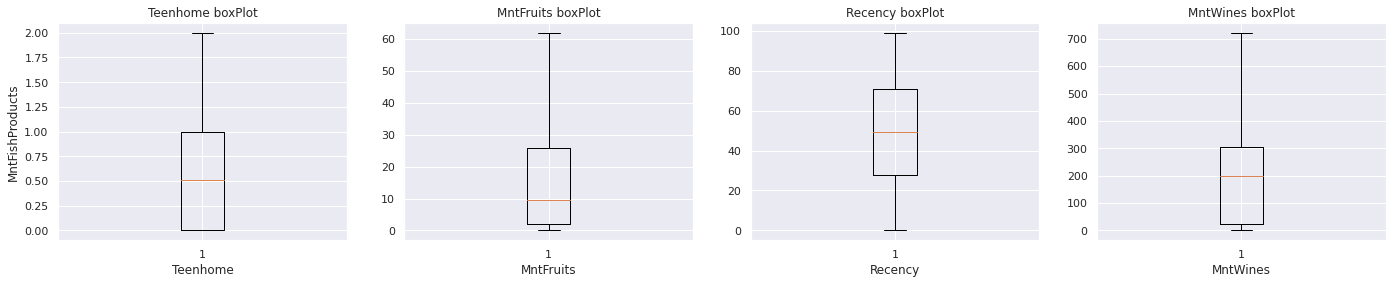

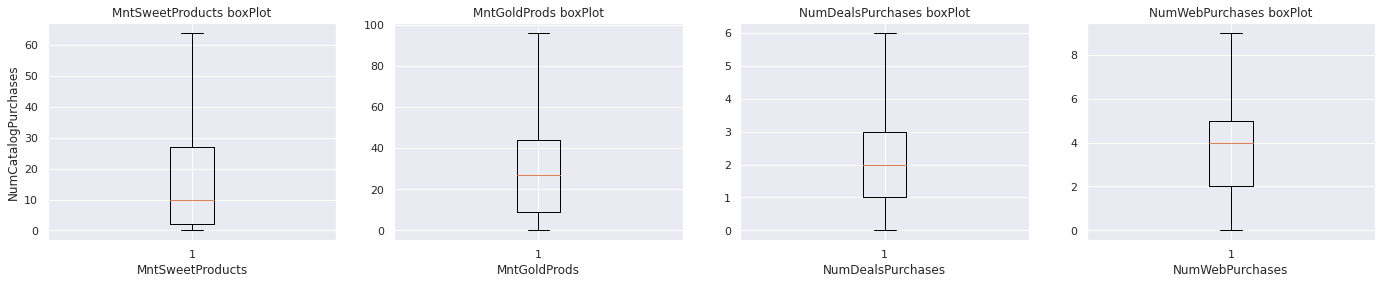

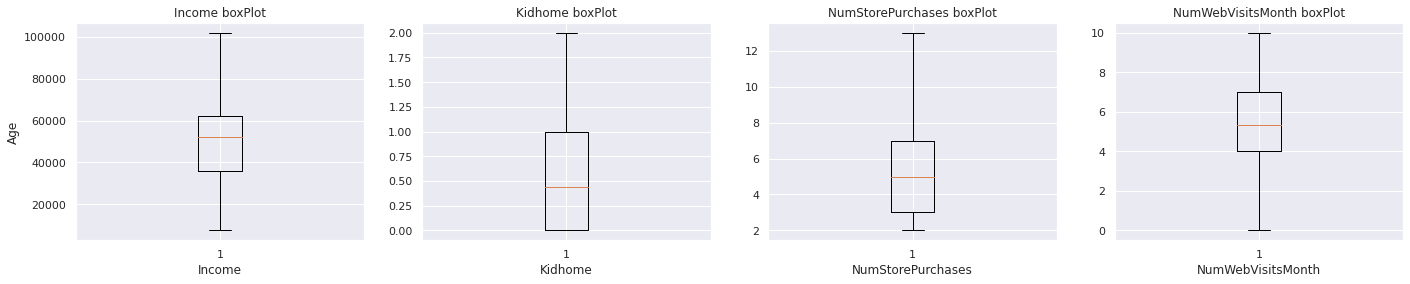

In [ ]:
# Check for the presence of Outlier again.

def outlier_check (dataframe, a, b, c, d, dependent):
    plt.figure(figsize =(30,4))
    sns.set(style = 'darkgrid')
    plt.subplot(1,5,1)
    plt.boxplot(dataframe[a])
    plt.title(a + ' boxPlot')
    plt.xlabel(a)
    plt.ylabel(dependent)
    plt.subplot(1,5,2)
    plt.boxplot(dataframe[b])
    plt.title(b + ' boxPlot')
    plt.xlabel(b)
    plt.subplot(1,5,3)
    plt.boxplot(dataframe[c])
    plt.title(c + ' boxPlot')
    plt.xlabel(c)
    plt.subplot(1,5,4)
    plt.boxplot(dataframe[d])
    plt.title(d + ' boxPlot')
    plt.xlabel(d)
    plt.show()

outlier_check(num, 'Teenhome', 'MntFruits', 'Recency', 'MntWines', 'MntFishProducts')
outlier_check(num, 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases')
outlier_check(num, 'Income', 'Kidhome', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age')

The boxplot subplots above shows a good distribution accross all numerical features

In [ ]:
# - Standardize the numerical data so that the dataset can have a mean of 0 and Varaiance of 1
# -  it is generally not recommended to standard scale the entire dataframe. Only scale numerical features

from sklearn.preprocessing import MinMaxScaler # ............................. Import the scaler from sklearn library
scaler = MinMaxScaler() # .................................................... instantiate the scaler and save it to a variable name

numericals = num.drop(['Response'], axis = 1) # ................................ Exclude the target output so we dont scale it.
for i in numericals.columns: # ........................... Loop through all the columns in numerical features
  ds[[i]] = scaler.fit_transform(ds[[i]]) #..................................... Scale them 
ds.head(3)

,Education,Marital_Status,Age,Age_category,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,0.5,0.285714,0.252427,0.666667,0.124982,0.0,0.0,6/16/2014,0.0,0.126591,...,0.428571,0.718631,0.602210,0.066667,0.148148,0.142857,0.461538,0.05,1,0.0
1,0.5,0.571429,0.339806,0.666667,0.083258,0.0,0.0,6/15/2014,0.0,0.310784,...,0.027027,0.000000,0.102210,0.066667,0.259259,0.107143,0.538462,0.25,1,0.0
2,0.5,0.428571,0.368932,0.666667,0.098561,0.0,0.5,5/13/2014,0.0,0.089752,...,0.057915,0.007605,0.082873,0.066667,0.111111,0.071429,0.384615,0.10,0,0.0


In [ ]:
x = ds.drop(['Response', 'Dt_Customer'], axis = 1) # ................................ Diferentiate your features and your target
y = ds.Response.astype(int)

<br>
<hr><h2><b>FEATURE SELECTION</b><hr><hr>

<b>Feature Selection:</b> In Machine Learning, feature selection is used to select a subset of relevant features (variables, predictors, etc.) for use in model construction. This is an important step in the process of a Machine Learning project, it’s also a part of feature engineering.
<br> For the purpose of this project, we will be usng the XGBOOST Feature importance, and the Select K-Best<br> Scikit-learn API provides SelectKBest class for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training. It helps us to eliminate less important part of the data and reduce a training time.

In [ ]:
# Check the kind of target
from sklearn.utils.multiclass import type_of_target
type_of_target(y)

'binary'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

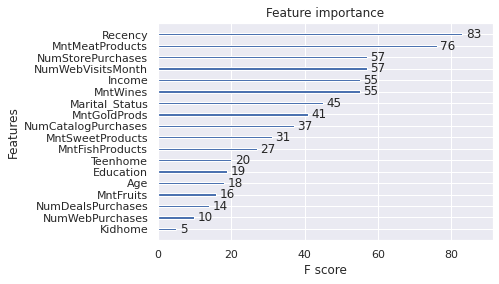

In [ ]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [ ]:
# ANOVA F-value between label/feature
best_feature1 = SelectKBest(score_func = f_classif, k = 20)
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score'] 
k1 = feat_score1.nlargest(20, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
8,MntWines,145.728750
10,MntMeatProducts,132.396830
16,NumCatalogPurchases,114.711734
7,Recency,91.738346
6,Teenhome,54.688509
15,NumWebPurchases,50.625517
13,MntGoldProds,44.644092
4,Income,40.150771
9,MntFruits,35.690773
12,MntSweetProducts,31.261719


On the basis of the XGBoost and the Select K-best Feature Selection, we will select the features that has the highest predictive power. 

In [ ]:
sel_feat = ['Recency', 'MntMeatProducts', 'NumStorePurchases', 'MntWines', 'NumCatalogPurchases', 'Age',
            'NumWebPurchases', 'Income', 'MntGoldProds', 'Marital_Status', 'MntFishProducts', 'MntSweetProducts']

sel_feat = ds[sel_feat]
sel_feat.head(3)

,Recency,MntMeatProducts,NumStorePurchases,MntWines,NumCatalogPurchases,Age,NumWebPurchases,Income,MntGoldProds,Marital_Status,MntFishProducts,MntSweetProducts
0,0.0,0.219710,0.461538,0.126591,0.142857,0.252427,0.148148,0.124982,0.602210,0.285714,0.428571,0.718631
1,0.0,0.037101,0.538462,0.310784,0.107143,0.339806,0.259259,0.083258,0.102210,0.571429,0.027027,0.000000
2,0.0,0.034203,0.384615,0.089752,0.071429,0.368932,0.111111,0.098561,0.082873,0.428571,0.057915,0.007605


<AxesSubplot:>

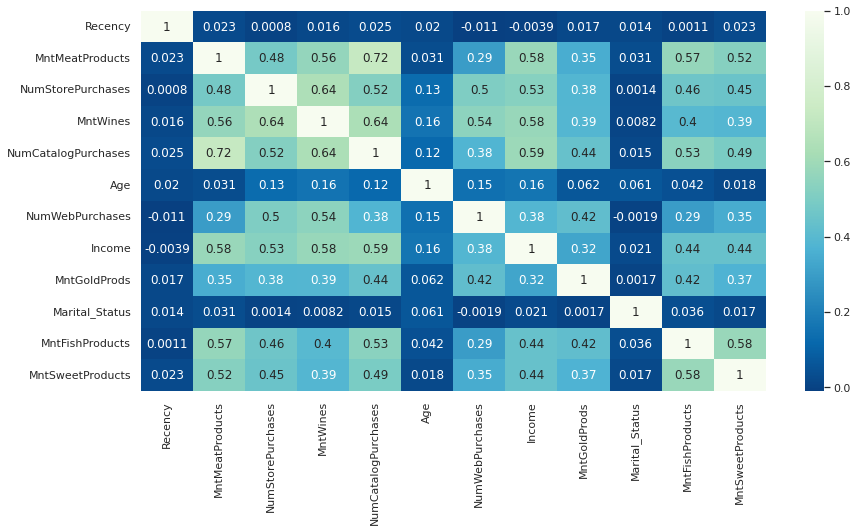

In [ ]:
# - Check for Multi-Colinearity in the chosen features.
plt.figure(figsize = (14, 7))
sns.heatmap(sel_feat.corr(), annot = True, cmap = 'GnBu_r')

The Heamtmap above there is no high Multi Colinearity between the Independent Variables. Hence, we proceed to Modelling with XGBOOST and Random Forest, compare the accuracies of these models, and select the best.

<hr>
<h3><b>MODELLING</b></h3>
<hr><hr>

In [ ]:
# - split into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = train_test_split(sel_feat, y, test_size = 0.15, random_state = 45, stratify = y)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (1904, 12)
x_test: (336, 12)
y_train: (1904,)
y_test: (336,)


<hr><h4><b><u>XGBOOST</u></b></h4><hr>
Gradient boosting is one of the most powerful techniques for building predictive models, and it is called a Generalization of AdaBoost. The main objective of Gradient Boost is to minimize the loss function by adding weak learners using a gradient descent optimization algorithm. The generalization allowed arbitrary differentiable loss functions to be used, expanding the technique beyond binary classification problems to support regression, multi-class classification and more.<br>
<b>XGBoost stands for “Extreme Gradient Boosting”</b>. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way. 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
xgb_model = xgb.XGBClassifier() # .................................................. Instantiate the Algorithm
xgb_model.fit(x_train, y_train) # ....................................................... Fit the model on our selected dataframe.

cross_val = xgb_model.predict(x_train) #........................................ Cross Validating to check for performance on training
print(classification_report(y_train, cross_val))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1620
           1       0.88      0.52      0.65       284

    accuracy                           0.92      1904
   macro avg       0.90      0.75      0.80      1904
weighted avg       0.92      0.92      0.91      1904



              precision    recall  f1-score   support

           0       0.88      0.96      0.92       286
           1       0.50      0.24      0.32        50

    accuracy                           0.85       336
   macro avg       0.69      0.60      0.62       336
weighted avg       0.82      0.85      0.83       336



<AxesSubplot:>

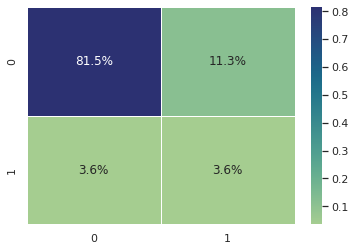

In [ ]:
xgb_prediction = xgb_model.predict(x_test) #.................................... Check the model performance on on new (test) dataset
print(classification_report(y_test, xgb_prediction))

revealer = confusion_matrix(xgb_prediction, y_test)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

The evaluation above shows that the model did not overfit because it has above average precision accuracy in each categorical class. ( Check the precision accuracy for class 0 and class 1.)

<hr><h4><b><u>RANDOM FOREST</u></b></h4>
<hr>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_forest_model = RandomForestClassifier() # ................................. Instantiate the Algorithm
rand_forest_model.fit(x_train, y_train) # ...................................... Fit the model on our selected dataframe.

cross_val = rand_forest_model.predict(x_train) #................................ Cross Validating to check for performance on training
print(classification_report(y_train, cross_val))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1620
           1       1.00      0.95      0.97       284

    accuracy                           0.99      1904
   macro avg       0.99      0.98      0.98      1904
weighted avg       0.99      0.99      0.99      1904



              precision    recall  f1-score   support

           0       0.88      0.97      0.92       286
           1       0.59      0.26      0.36        50

    accuracy                           0.86       336
   macro avg       0.74      0.61      0.64       336
weighted avg       0.84      0.86      0.84       336



<AxesSubplot:>

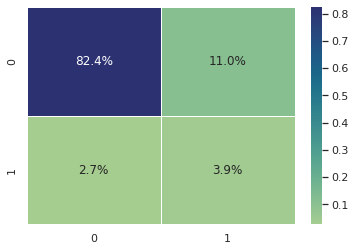

In [ ]:
rand_forest_predict = rand_forest_model.predict(x_test) #....................... Check the model performance on on new (test) dataset
print(classification_report(y_test, rand_forest_predict))

revealer = confusion_matrix(rand_forest_predict, y_test)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

<hr><h4><b><u>Model Interpretation:</u></b></h4>
On the <b><u>XGBoost</u></b>, the train validation shows the model performed well on the training as it achieves an optimal precision on both classes of category, hence, there was no underfitting. <br>
It has a better test performance on the majority class 0, and had a lesser performance on the minority class 1. The Model is generally acceptable.<br><br>
On the <b><u>RandomForest</u></b>, the train validation shows a good performance on both classes, thus, does not underfit. It also has an optimal performance on the test set as the model has an precision of 88% on the class 0 and has a precision of 59% on class 1. <br><br>
This model could be improved using the Grid search or Random Search.<br>
We will be using both the Grid Search CV and the Random Serach CV to boost the performance of the model to achieve a accurate prediction on the test set.<hr>

<h4><b><u>Important Features:</u></b></h4>
'Recency', 'MntMeatProducts', 'NumStorePurchases', 'MntWines', 'NumCatalogPurchases', 'Age',
            'NumWebPurchases', 'Income', 'MntGoldProds', 'Marital_Status', 'MntFishProducts', 'MntSweetProducts' <hr>

<hr><br><u><b><h2>PCA IMPLEMENTATION:</h2></b></u><br>
Using PCA to achieve a more accurate model.

In [ ]:
# import PCA and find out the optimal number of components

dataframe = ds.drop(['Response', 'Dt_Customer'], axis = 1) 

from sklearn.decomposition import PCA # ........................................ Import the PCA Algorithm
pca = PCA(n_components = x.shape[1])   # ......................................... Firstly, make all the entire columns to be components
pca.fit(dataframe) # ........................................................... Fit the PCA Algorithm on the dataset

x_pca = pca.transform(dataframe) # ............................................. transform the data
display(pd.DataFrame(x_pca).head()) # .......................................... Turn the dataset to a datadataframe for easy visualization.
print('x_pca: ',x_pca.shape)
print('dataframe: ', dataframe.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.610625,-0.388849,-0.482182,0.088683,0.248959,0.259905,-0.316031,0.296735,0.063829,0.053706,0.238468,0.441985,0.057816,-0.086437,0.014274,-0.105669,-0.049794,-0.082858,-0.046201,0.021951
1,0.117193,-0.057979,-0.501753,0.022045,0.231051,-0.154658,0.336210,-0.030798,-0.020841,0.014255,0.043593,-0.027519,-0.016826,-0.043742,-0.003546,0.028930,0.099116,0.030999,-0.002684,0.003697
2,-0.047613,0.196907,-0.477542,0.297473,0.230735,-0.169690,-0.054832,0.109635,-0.072826,-0.017150,-0.097116,0.055881,-0.103282,0.039069,-0.013750,-0.029377,0.074793,-0.007263,0.010941,0.012869
3,-0.541242,0.134550,-0.467871,0.233331,0.117853,0.128458,-0.054690,-0.178976,0.020056,0.039443,-0.133569,0.023232,-0.047784,-0.063521,-0.016458,0.034320,-0.058076,-0.001737,-0.044862,-0.005136
4,-0.513773,-0.488139,-0.499656,-0.131554,-0.236683,-0.133683,-0.121722,-0.073189,0.079019,0.032521,0.032837,-0.011417,-0.037346,-0.008040,-0.001002,0.006968,0.032605,0.036532,0.055259,-0.018636


x_pca:  (2240, 20)
dataframe:  (2240, 20)


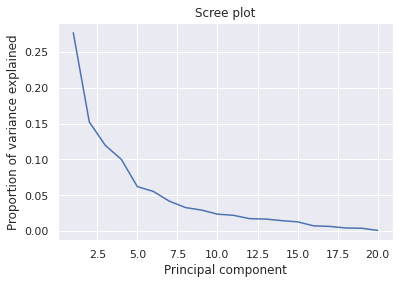

In [ ]:
# Here we ascertain what optimum number of components will be best, using the elbow plot

sns.set(style = 'darkgrid')
plt.plot(range(1, dataframe.shape[1] + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.title('Scree plot')
plt.show()

In [ ]:
# Input the percentage of information we desire for the PCA to capture.

pca = PCA(n_components = 0.9)
pca.fit(dataframe)

PCA(n_components=0.9)

In [ ]:
# Having gotten the optimal number of component, we go ahead to transform our data to fit into this component

x_pca = pca.transform(dataframe) # ............................................. Transform the data
display(pd.DataFrame(x_pca).head()) # .......................................... Turn to dataframe
print('x_pca: ',x_pca.shape)
print('dataframe: ', dataframe.shape)

,0,1,2,3,4,5,6,7,8,9,10
0,0.610625,-0.388849,-0.482182,0.088683,0.248959,0.259905,-0.316031,0.296735,0.063829,0.053706,0.238468
1,0.117193,-0.057979,-0.501753,0.022045,0.231051,-0.154658,0.336210,-0.030798,-0.020841,0.014255,0.043593
2,-0.047613,0.196907,-0.477542,0.297473,0.230735,-0.169690,-0.054832,0.109635,-0.072826,-0.017150,-0.097116
3,-0.541242,0.134550,-0.467871,0.233331,0.117853,0.128458,-0.054690,-0.178976,0.020056,0.039443,-0.133569
4,-0.513773,-0.488139,-0.499656,-0.131554,-0.236683,-0.133683,-0.121722,-0.073189,0.079019,0.032521,0.032837


x_pca:  (2240, 11)
dataframe:  (2240, 20)


In [ ]:
# Find out how much information of the original dataset this dimensionality reduction covers

cumulative_variance = pca.explained_variance_ratio_
display(cumulative_variance)

 # Show the total variance explained by the newly created features
print(f"sum of information captured: {sum([i for i in cumulative_variance])}")

array([0.2768904 , 0.15221264, 0.11960989, 0.10005234, 0.06204088,
       0.05531832, 0.04165543, 0.03283413, 0.02932579, 0.02357385,
       0.0219795 ])

sum of information captured: 0.915493194572245


<u>The PCA covers 91% of information in the original dataset.<br>
Now we can go forward to use this new dataset for modelling.</u>

Text(0.5, 1.0, 'Histogram scree plot')

<Figure size 1152x504 with 0 Axes>

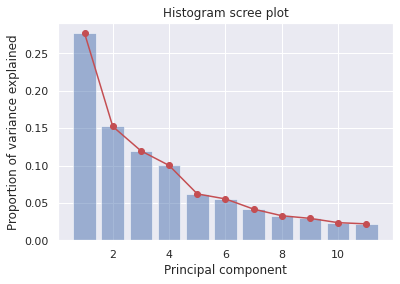

In [ ]:
plt.figure(figsize = (16, 7))
fig, ax = plt.subplots()
ax.bar(range(1,x_pca.shape[1] + 1 ), pca.explained_variance_ratio_, alpha=0.5, align='center')
ax.plot(range(1,x_pca.shape[1] + 1 ), cumulative_variance, 'o-', color='r')
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.title('Histogram scree plot')

In [ ]:
# - Concatenate the new PCA dataframe, with the target output.

new_df = pd.concat([pd.DataFrame(x_pca), ds.Response], axis = 1)

# - Split into x and y for further train and test split
pca_x = new_df.drop(['Response'], axis = 1) 
pca_y = new_df.Response

new_df.head()

,0,1,2,3,4,5,6,7,8,9,10,Response
0,0.610625,-0.388849,-0.482182,0.088683,0.248959,0.259905,-0.316031,0.296735,0.063829,0.053706,0.238468,1
1,0.117193,-0.057979,-0.501753,0.022045,0.231051,-0.154658,0.336210,-0.030798,-0.020841,0.014255,0.043593,1
2,-0.047613,0.196907,-0.477542,0.297473,0.230735,-0.169690,-0.054832,0.109635,-0.072826,-0.017150,-0.097116,0
3,-0.541242,0.134550,-0.467871,0.233331,0.117853,0.128458,-0.054690,-0.178976,0.020056,0.039443,-0.133569,0
4,-0.513773,-0.488139,-0.499656,-0.131554,-0.236683,-0.133683,-0.121722,-0.073189,0.079019,0.032521,0.032837,1


In [ ]:
# - Split into train and test
xtrain_pca, xtest_pca, ytrain_pca, ytest_pca = train_test_split(pca_x, pca_y, test_size = 0.10, random_state = 20)
print(f"X Train rows and column: {x_train.shape}")
print(f"Y Train rows and column: {y_train.shape}")
print(f"X Test rows and column: {x_test.shape}")
print(f"Y Test rows and column: {y_test.shape}")

X Train rows and column: (1904, 12)
Y Train rows and column: (1904,)
X Test rows and column: (336, 12)
Y Test rows and column: (336,)


In [ ]:
rf_pca_model = RandomForestClassifier() # ................................. Instantiate the Algorithm
rf_pca_model.fit(xtrain_pca, ytrain_pca) # ...................................... Fit the model on our selected dataframe.

cross_val = rf_pca_model.predict(xtrain_pca) #................................ Cross Validating to check for performance on training
print(classification_report(ytrain_pca, cross_val))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1719
           1       0.99      0.96      0.97       297

    accuracy                           0.99      2016
   macro avg       0.99      0.98      0.98      2016
weighted avg       0.99      0.99      0.99      2016



              precision    recall  f1-score   support

           0       0.88      0.98      0.93       187
           1       0.80      0.32      0.46        37

    accuracy                           0.88       224
   macro avg       0.84      0.65      0.70       224
weighted avg       0.87      0.88      0.85       224



<AxesSubplot:>

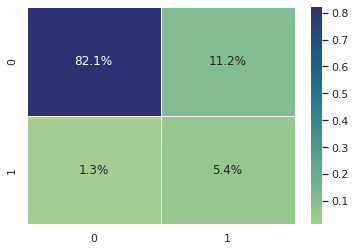

In [ ]:
rf_pca_predict = rf_pca_model.predict(xtest_pca) #....................... Check the model performance on new pca test dataset
print(classification_report(ytest_pca, rf_pca_predict))

revealer = confusion_matrix(rf_pca_predict, ytest_pca)

sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

The classification report above shows there is an improvement in the prediction precision of each classes. There is a significant improvement in the PCA data random forest model than the PCA data random forest. It captures more of the monority class than it did before.    